In [9]:
import pandas as pd

# Load your dataset
ronaldo_shots = pd.read_csv("cristiano_ronaldo_shots_with_outcomes.csv")

# Check coordinate ranges for the dataset
print("pos_orig_x range:", df['pos_orig_x'].min(), "to", df['pos_orig_x'].max())
print("pos_orig_y range:", df['pos_orig_y'].min(), "to", df['pos_orig_y'].max())
print("pos_dest_x range:", df['pos_dest_x'].min(), "to", df['pos_dest_x'].max())
print("pos_dest_y range:", df['pos_dest_y'].min(), "to", df['pos_dest_y'].max())




pos_orig_x range: 0 to 100
pos_orig_y range: 0 to 100
pos_dest_x range: 0 to 100
pos_dest_y range: 0 to 100


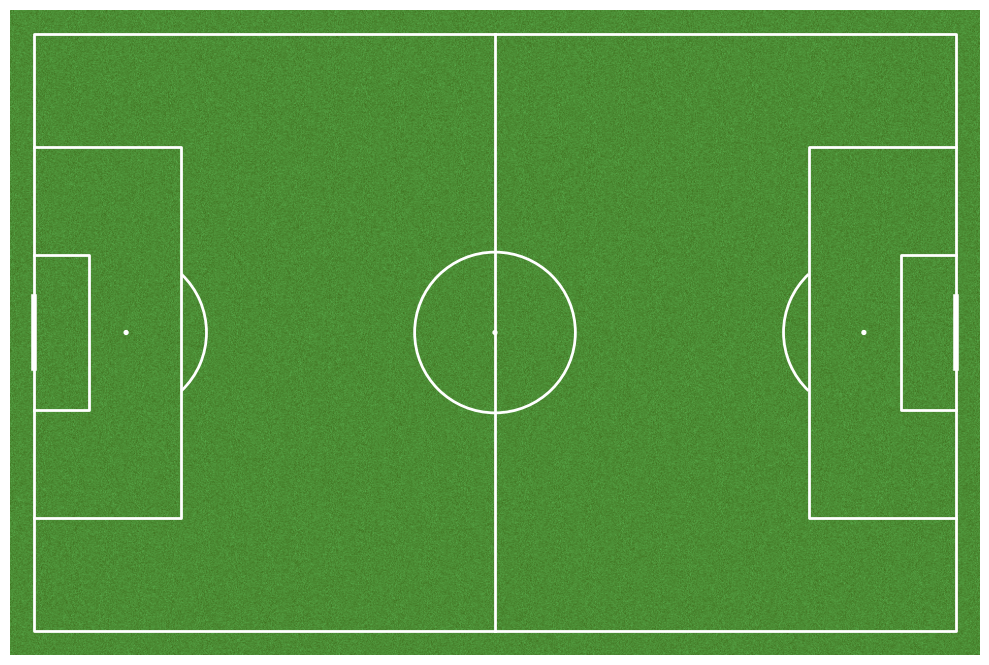

In [15]:
# Importing pitch from mplsoccer
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Create a pitch to test
pitch = Pitch(pitch_type='wyscout', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))
plt.show() 

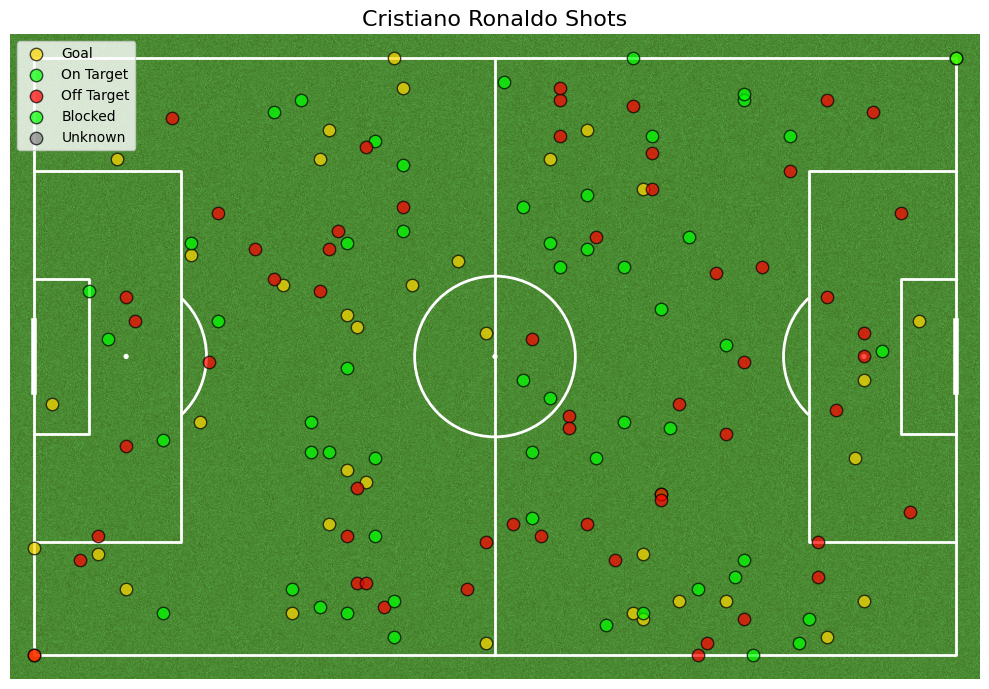

In [19]:

# Create the pitch 
pitch = Pitch(pitch_type='wyscout', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))

# Define colors for each outcome
colors = {
    'Goal': 'gold',
    'On Target': 'lime',
    'Off Target': 'red',
    'Blocked': 'lime', # Using lime for blocked shots as well based on the definition of 'On Target' shots 
    'Unknown': 'gray' # I added this in case there are any unknown outcomes but I am sure there are none
}

# Plot the shots on the pitch
for outcome, color in colors.items():
    subset = ronaldo_shots[ronaldo_shots['shot_outcome'] == outcome]
    pitch.scatter(
        x=subset['pos_orig_x'],   # toward opponent’s goal
        y=100 - subset['pos_orig_y'],  # flip horizontally (so right is right)
        color=color,
        label=outcome,
        ax=ax,
        edgecolors='black',
        s=80,
        alpha=0.7
    )

# Add arrows for direction (optional)
#pitch.arrows(
    #ronaldo_shots['pos_orig_x'], ronaldo_shots['pos_orig_y'],
    #ronaldo_shots['pos_dest_x'], ronaldo_shots['pos_dest_y'],
    #color='white', width=1, headwidth=4, headlength=5, ax=ax, alpha=0.5
#)

# Add title and legend
ax.set_title("Cristiano Ronaldo Shots", fontsize=16)
ax.legend(loc='upper left', fontsize=10)

plt.show()


In [25]:
ronaldo_shots['shot_outcome'].value_counts(dropna=False)



shot_outcome
Off Target    58
Goal          37
On Target     33
Blocked       23
Name: count, dtype: int64